## Обучение без учителя

Ранее мы рассматривали в основном только задачи, где у части данных (тренировочной) была размечена целевая функция (таргет), а для другой части данных (тестовой) таргета нет, и мы хотели его восстановить. Такие задачи (классификация, регрессия, ранжирование), как вы помните, называются **обучением с учителем** (supervised learning).

Давайте посмотрим теперь на задачи, в которых таргета не дано - но все же что-то сопоставить каждому элементу надо. Такие задачи называются обучением без учителя (**unsupervised learning**).

Примеры таких задач:
* кластеризация
* уменьшение размерности
* визуализация
* вложение в пространство (но это не точно)

In [0]:
# Можете в самом начале поставить себе скачиваться вот эти библиотеки, они могут пригодиться:
import cv2
import gensim

In [0]:
# стандартные импорты
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Кластеризация

Сама задача состоит в разделении точек в пространстве на кластеры близко расположенных. Так как вы уже разбирали и даже писали k-Means, давайте просто посмотрим, какие есть способы решить эту задачу.

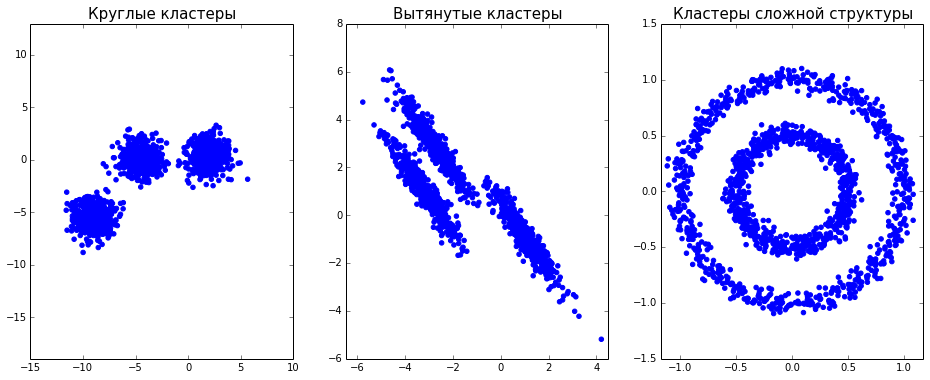

In [0]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

plt.figure(figsize=(16, 6))

X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Круглые кластеры", fontsize=15)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] # матрица преобразования
X_long = np.dot(X, transformation) # умножим на нее, чтобы растянуть кучки

plt.subplot(132)
plt.scatter(X_long[:, 0], X_long[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Вытянутые кластеры", fontsize=15)

X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)
plt.subplot(133)
plt.scatter(X_circles[:, 0], X_circles[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Кластеры сложной структуры", fontsize=15)


In [0]:
def apply_clusterization_algorithm(model_1, model_2, model_3):
    plt.figure(figsize=(16, 6))

    plt.subplot(131)
    y_pred = model_1.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='face')
    plt.axis('equal') # чтобы рисунок был не растянут
    plt.title(u"Вытянутые кластеры", fontsize=15)

    plt.subplot(132)
    y_pred = model_2.fit_predict(X_long)
    plt.scatter(X_long[:, 0], X_long[:, 1], c=y_pred, edgecolors='face')
    plt.axis('equal') # чтобы рисунок был не растянут
    plt.title(u"Вытянутые кластеры", fontsize=15)

    plt.subplot(133)
    y_pred = model_3.fit_predict(X_circles)
    plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_pred, edgecolors='face')
    plt.axis('equal') # чтобы рисунок был не растянут
    plt.title(u"Кластеры сложной структуры", fontsize=15)

### 1) K-Means.
<a href='https://www.naftaliharris.com/blog/visualizing-k-means-clustering/'> Визуализация</a>.

Нужно в начале выбрать K центров кластеров (K - константа, которую надо самому выбрать).

Дале итеративно выполняются 2 шага, пока обновления не перестанут происходить:
* Обновить кластеры, приписав каждой точке кластер самого близкого к ней центра
* Обновить центр каждого кластера как центр масс его точек

**Плюсы**:
* простой и понятный

**Минусы**:
* нужно знать K
* слишком простая модель, кластер = выпуклая околокруглая штука, так как это по сути диаграмма Вороного (если вы знаете, что это такое)
* если плохо выбрать начальные центры, может сойтись к плохому результату

Поэтому обычно K-Means запускают несколько раз и выбирают лучший результат.

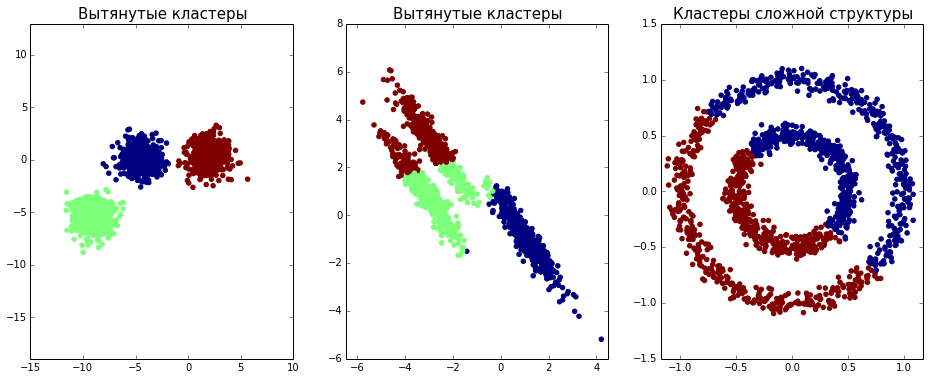

In [0]:
from sklearn.cluster import KMeans
apply_clusterization_algorithm(KMeans(n_clusters=3),
                               KMeans(n_clusters=3),
                               KMeans(n_clusters=2))

### 2) DBSCAN.
<a href='https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/'> Визуализация</a>.

DBSCAN строит столько кластеров, сколько получится, причем многие вершины могут не войти ни в один кластер, они называются **выбросами**.

DBSCAN опирается на два гиперпараметра:
* eps - означает расстояние, на котором две вершины считаются соседями
* min_samples - означает сколько нужно соседей из кластера, чтобы считать вершину коренной вершиной кластера

Сам алгоритм состоит из таких шагов:
* Выбрать соседей для каждой вершины на расстоянии до eps
* Найти компоненты связности коренных вершин - добавляем вершину в компоненту коренных, если у нее хотя бы min_samples соседей лежат в этой компоненте
* Добавить оставшиеся вершины в самый популярный кластер соседей, если есть соседи
* Оставшиеся вершины - это выбросы

**Плюсы**:
* сам подберет число кластеров
* опирается на плотность точек, кластеры могут быть вытянутыми и даже невыпуклыми

**Минусы**:
* нужно подбирать два других параметра


In [0]:
from sklearn.cluster import DBSCAN

apply_clusterization_algorithm(DBSCAN(eps=???, min_samples=???),
                               DBSCAN(eps=???, min_samples=???),
                               DBSCAN(eps=???, min_samples=???))

SyntaxError: invalid syntax (<ipython-input-7-b1ba8b5084c2>, line 3)

#### Задание:
Подберите параметры так, чтобы разбиение на кластеры было похожим на правильное.

### Домашнее задание № 1: Уменьшение палитры изображения
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения; после выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.
Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN

Можно использовать и другие:
* MeanShift
* AgglomerativeClustering
* Какие угодно, какие сможете найти

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Приведите примеры работы лучшего алгоритма на выбранных вами любых картинках :)



Вот вам вспомогательная функция для считывания и вывода изображений:

In [0]:
import cv2 # нужно поставить себе cv2

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

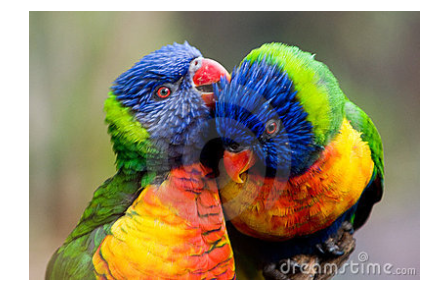

In [0]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [0]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3

(275, 400, 3)


## Уменьшение размерности и визуализация

Обе эти задачи состоят в **сжатии выборки**: нужно перевести точки из N-мерного пространства в M-мерное пространство, где M < N, причем так, чтобы близкие точки остались близкими. То есть хочется значительно уменьшить число признаков, не сильно потеряв (или даже улучшив) их качество.

Для примеров мы будем чаще всего переводить в 2-мерное пространство - это заодно и хороший способ **визуализировать** датасет.

Давайте, например, рассмотрим известный датасет с цифрами.

In [0]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

Каждое изображение представляет из себя квадратик 8x8, в каждой клетке которого написано число от 0 до 15 - насколько клетка черная. Вот, например, ноль:

In [0]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
y[0]

0

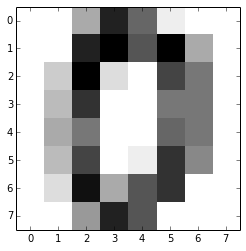

In [0]:
# а это один способов нарисовать цифру прямо в графике :)
plt.imshow(X[0, :].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Можем посмотреть на разные цифры, например на пятерки:


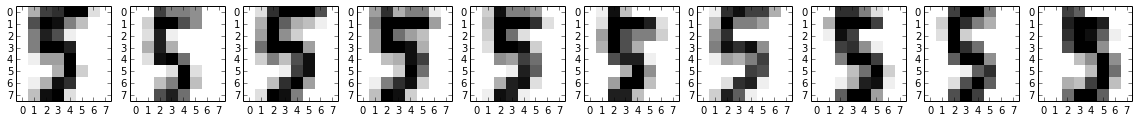

In [0]:
DIGIT = 5
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X[(y == DIGIT)][:NUMBER_DIGITS]
for i in range(len(digits)):
    plt.subplot(1, len(digits), i)
    plt.imshow(digits[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

Рассмотрим каждое изображение как на вектор в 64-мерном пространстве (64 признака). 

Тогда интересно уменьшить размерность этих векторов до 2 с помощью, например, алгоритма PCA.

### 1) PCA  (метод главных компонент)

<a href='http://setosa.io/ev/principal-component-analysis/'>Визуализация</a> выделения первой и второй главных компонент методом PCA.

<a href='https://ru.wikipedia.org/wiki/Метод_главных_компонент'> Метод PCA </a> заключается в том, чтобы найти в N-мерном пространстве такое K-мерное пространство, что проекция всех точек на него будет как можно более рассеянной (то есть иметь наибольшую дисперсию).

Оказывается, подходит пространство, сумма квадратов расстояния от которого до всех точек минимальна.

Первая компонента (ось) выбирается так, чтобы была дисперсия проекция вдоль нее была максимальна:

![dispersion.jpg](dispersion.jpg)

После этого все точки проецируются вдоль первой компоненты и там таким же способом выбирается вторая компонента и так далее.

Получившиеся К компонент будут образовывать K-мерное пространство, проекция точек на которое будет иметь наибольшую дисперсию.

In [0]:
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

pca = PCA(n_components=2)
# Применим PCA к нашим векторам с цифрами
X_pca_2 = pca.fit(X).transform(X)
X_pca_2

array([[ -1.25946636,  21.27488264],
       [  7.95761116, -20.76869832],
       [  6.991923  ,  -9.95598487],
       ...,
       [ 10.80128387,  -6.96025457],
       [ -4.8721    ,  12.4239543 ],
       [ -0.34438943,   6.36554689]])

А если мы переведем в пространство большей степени, то смотрите, у нас все первые координаты всегда совпадают:

In [0]:
pca = PCA(n_components=4)

X_pca_4 = pca.fit(X).transform(X)
X_pca_4

array([[ -1.25946647,  21.27488332,  -9.46305405,  13.0141907 ],
       [  7.95761132, -20.76869877,   4.4395054 , -14.89366601],
       [  6.99192298,  -9.95598634,   2.95855779, -12.28830326],
       ...,
       [ 10.80128371,  -6.96025238,   5.59955506,  -7.22773317],
       [ -4.87210013,  12.42395314, -10.17086458,  -6.66884616],
       [ -0.34438965,   6.365549  ,  10.77370922,  -7.72621152]])

Это и логично: k-я координата - это просто длины проекции на k-ю компоненту.

Давайте визуализируем две первые компоненты (одинаковыми цветами показаны одинаковые цифры):

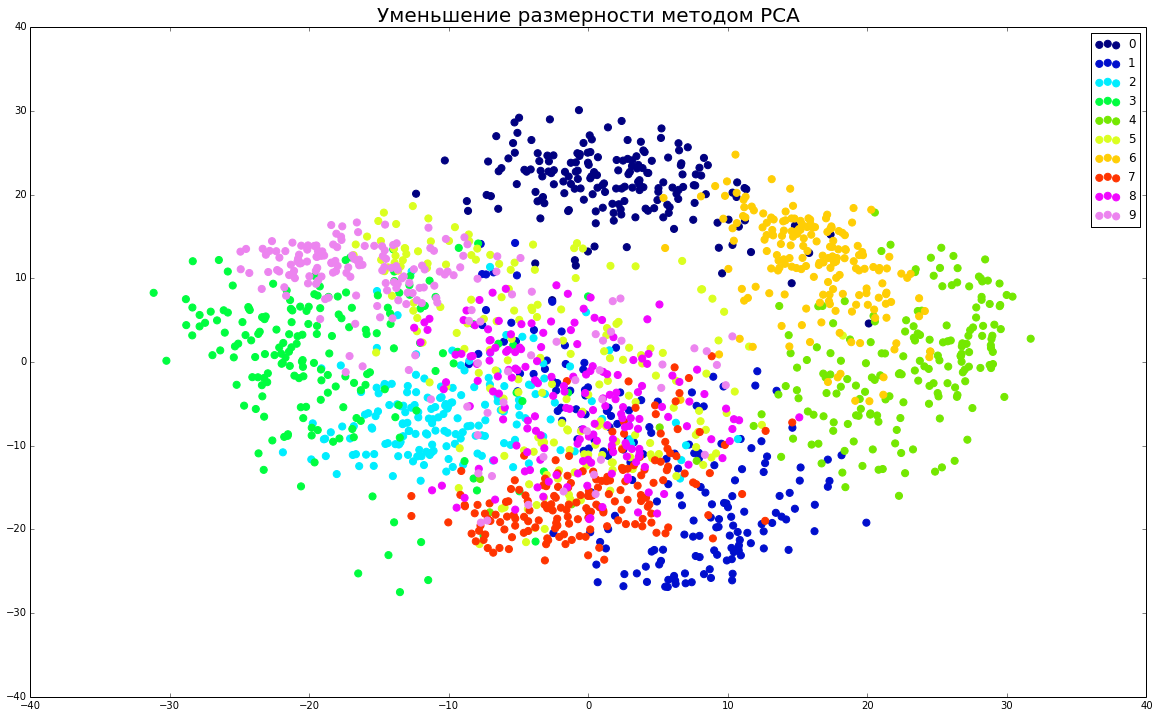

In [0]:
plt.figure(figsize=(20, 12))
for d in range(10): # перебираем цифру
    norm = Normalize(vmin=0, vmax=10) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca_2[:, 0][y == d],
                X_pca_2[:, 1][y == d],
                c=[color] * len(X_pca_2[:, 0][y == d]), label=d, edgecolor='face', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

#### Задание:

А попробуйте визуализировать третью и четвертую компоненты. Какие пары цветов стало проще отделить? Какие цвета стало сложнее отделить?

В каком-то смысле PCA - это лучший линейный способ уменьшить размерность пространства.

**Плюсы PCA:**
* считается относительно быстро
* детерминированность
* любая размерность
* полученную модель уменьшения размерности можно применять и к новым точкам (нужно просто спроецировать ее на выделенное K-мерное пространство)
* визуализация при K = 2 - это честная проекция на какую-то плоскость, легкая интерпретируемость результатов
* при увеличении размерности старые координаты не меняются

**Минусы PCA:**
* алгоритм слишком простой - он линейный
* некоторы непохожие точки могут спроецироваться в одну и ту же при K = 2

Мы видим, что классы одинаковых цифр не до конца отделились друг от друга, и в 2-мерном пространстве эту проблему можно решить только если использовать какой-нибудь нелинейный алгоритм.

### 2) t-SNE
<a href='https://distill.pub/2016/misread-tsne/'>Визуализация</a> метода уменьшения размерности t-SNE.

Это гораздо более сложный нелинейный <a href='https://habr.com/post/267041/'> алгоритм</a>. Он очень крут для визуализации данных, и работает только с переводом в 2D и 3D.

** Плюсы t-SNE **
* отлично визуализирует (2D, 3D) данные
* физически разносит разные точки дальше друг от друга
* сильно разные точки не могут в конце оказаться рядом

** Недостатки t-SNE **
* недетерминированность, результат меняется при каждом запуске
* координаты ничего не значат сами по себе
* нельзя легко добавить новые данные
* долго работает
* уменьшает только до 2 и 3 размерности


Давайте запустим на 400 итерациях (у меня работает секунд 20, если у вас долго не работает, то уменьшите число итераций):

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


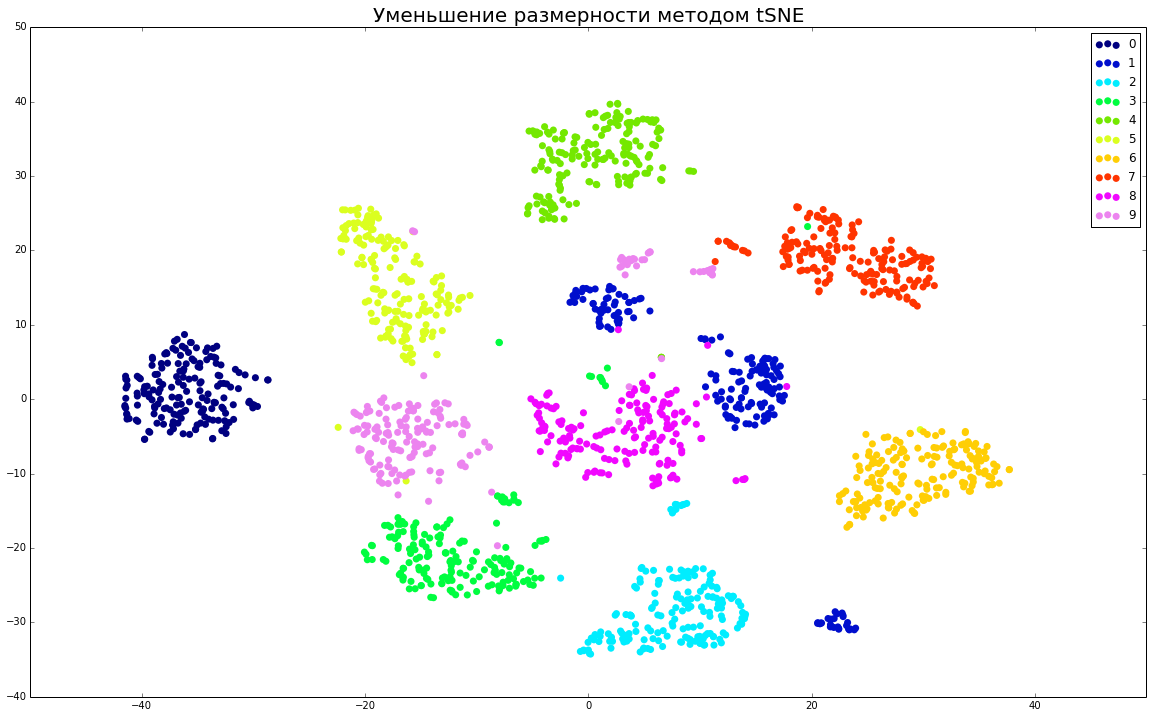

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne_2 = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne_2[:, 0][y == d],
                X_tsne_2[:, 1][y == d],
                c=[color] * len(X_tsne_2[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

Заметьте, что мы никак не использовали метки классов! Но они отделились фантастически!

Несмотря на то, что мы выкинули очень много данных, кажется, что во вложении tSNE решить задачу классификации стало только проще.

А вот PCA при вложении теряет много информации, и качество должно ухудшиться (зато работают быстрее).

Давайте проверим: запустим классификацию на обычном датасете и на сжатых с помощью PCA и tSNE.

Здесь у нас будет классификация не бинарная, ведь классов аж 10, а мы такие еще не рассматривали. Но на самом деле небинарная классификация - это просто 10 раз применить бинарную классификацию в формате "один против всех". То есть мы решаем отдельно задачу для каждого класса против всех остальных, после чего получаем вероятности принадлежности рисунка каждому классу и выбираем лучшую вероятность.

In [0]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

# будем применять, например, логистическую регрессию
print('accuracy for raw data is {}'.format(cross_val_score(LogisticRegression(),
                                                           X, y,
                                                           scoring='accuracy').mean()))
print('accuracy for data transormed by PCA-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                            X_pca_2, y,
                                                                            scoring='accuracy').mean()))
print('accuracy for data transormed by tSNE-2D is {}'.format(cross_val_score(LogisticRegression(),
                                                                             X_tsne_2, y,
                                                                             scoring='accuracy').mean()))

accuracy for raw data is 0.9182204459698582
accuracy for data transormed by PCA-2D is 0.553506378473749
accuracy for data transormed by tSNE-2D is 0.8708740687061299


Мы видим, что сжатый с помощью tSNE датасете все-таки проигрывает в качестве классификации обычному, но несильно. На самом деле, если взять какой-нибудь нелинейный классификатор, то, возможно, можно даже улучшить качество.

А вот PCA сильно проигрывает tSNE. Однако это потому, что мы снизили размерность аж до двух. Давайте возьмем побольше размерность признаков.

### Задание:
Переберите размерность сжатия датасета с помощью PCA и посчитайте для каждой из них качество классификации. Сколько признаков достаточно оставить, чтобы качество отличалось несильно?

Интересно еще посмотреть на ошибки нашей классификации:

In [0]:
model = LogisticRegression()
X_tsne_2_train, X_tsne_2_test, y_tsne_2_train, y_tsne_2_test = train_test_split(X_tsne_2, y, random_state=42)
model.fit(X_tsne_2_train, y_tsne_2_train)
y_pred = model.predict(X_tsne_2_test)
errors = (y_pred != y_tsne_2_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

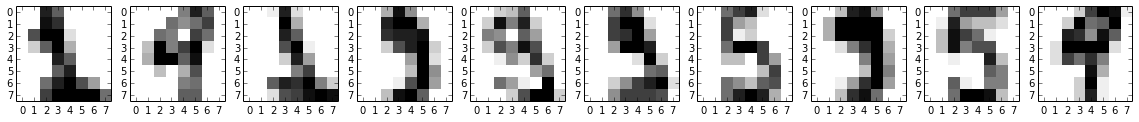

In [0]:
NUMBER_DIGITS = 10

plt.figure(figsize=(20, 12))
digits = X_test[errors][:NUMBER_DIGITS]
for i, digit in enumerate(digits):
    plt.subplot(1, len(digits), i + 1)
    plt.imshow(digit.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [0]:
# Предсказали:
y_pred[errors][:len(digits)]

array([2, 1, 2, 3, 3, 3, 9, 3, 9, 1])

In [0]:
# А на самом деле:
y_test[errors][:len(digits)]

array([1, 9, 1, 9, 9, 9, 5, 9, 5, 9])

в некоторых из этих примеров и люди могут ошибиться :)

## Домашнее задание №2: Уменьшение размерности помогает классифицировать лица

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера.

Сами разделите выбору на тренировочную и тестовую части (20% в тестовой). Попробуйте добиться максимального accuracy
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках :).

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ.

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ.

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [0]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0) # эту строчку менять нельзя, ресайзить нельзя

In [0]:
X = lfw_people.data
y = lfw_people.target

In [0]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [0]:
y.shape

(2370,)

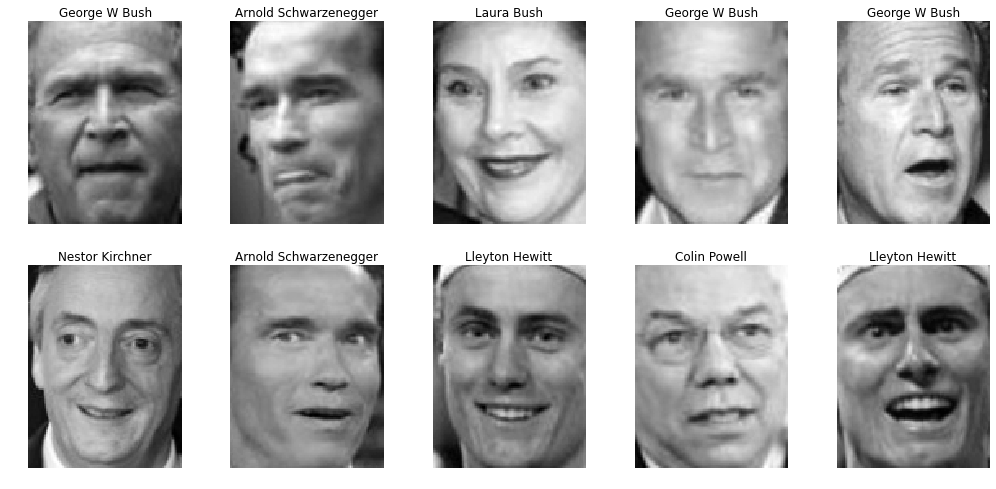

In [0]:
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)

In [0]:
## Вложение в пространство, word2vec

Было бы здорово, если бы все объекты в мире были векторами. Тогда ведь можно и
* проверять по двум объектам, насколько они похожи
* искать наиболее похожие на объекты на какой-то конкретный объект
* легко уменьшать размерность
* искать "средний вектор" какой-то группы объектов

С точки зрения программирования с векторами работать наиболее удобно. Но некоторые объекты никак с векторами не связаны:
* слова
* пользователи
* рекламные объявления
* товары
* сайты

Но благодаря алгоритму **Word2Vec** можно легко сделать **вложение в пространство** - оно же **ембеддинг**, то есть перевести объект в вектор так, чтобы **похожие объекты перешли в близкие векторы**.

Для этого нам понадобятся **предложения** - это просто наборы слов. Алгоритм Word2Vec принимает на вход много предложений, и возвращает сопоставление "слово -> вектор", причем словам, которые часто встречаются в предложении вместе, будут соответствовать близкие векторы.

Это не совсем unsupervised learning, потому что сам алгоритм внутри скрывает кусочек нейронной сети. Но применение этих векторов для решения абсолютно любых других задач - это, конечно же, обучение без учителя.

In [0]:
# нужна библиотека gensim
from gensim.models import Word2Vec

### Векторы по Властелину Колец

In [0]:
# нужен большой-большой текст, поделенный на предложения, например, Властелин Колец
# на самом деле, векторы получатся не самые хорошие, для этого нужен гораааздо больше предложений
with open("LordOfTheRings.txt", "r") as f:
    sentences = [sentence.split() for sentence in f.readlines()]
sentences[1000]

['frodo',
 'was',
 'waiting',
 'on',
 'the',
 'step',
 'smiling',
 'but',
 'looking',
 'rather',
 'tired',
 'and',
 'worried']

In [0]:
model = Word2Vec(sentences, # главный аргумент - массив с предложениями, предложение - массив со словами
                 size=200, # размерность (количество координат в векторе), которая нам нужна
                 window=5, # на каком расстоянии слова будут считаться похожими
                 min_count=1, # будем добавлять слова, которые встретились хотя бы min_count раз
                 workers=4) # запустим параллельно в 4 процесса

Итак, мы перевели каждое слово, которое встречается в тексте "Властелина Колец" в 200-мерный вектор. Теперь мы можем работать с этими словами как с векторами!

In [0]:
print(model.wv['king']) # вот вектор слова 'king', например (да, размера 200)

[-0.37226337  0.3308967   0.04291328  0.10878047 -0.0254171   0.16079985
  0.3784065   0.17776954 -0.52641284  0.35283068  0.8434205  -1.0352794
 -0.26621386 -0.44172415 -0.02714764 -0.2464378  -0.0080409   0.13941142
 -0.48062542 -0.39136028 -0.17627218 -0.28022105 -0.4313058  -0.56593364
 -0.21813835 -0.26723415 -0.4035436  -0.34170938  0.2400204  -0.33115545
 -0.263804   -0.0628488   0.38963586 -0.04167366  0.1287585  -0.51597637
  0.07719667  0.6595497   0.2724617  -0.12696955 -0.10870715 -0.35397846
 -0.66360635  0.65986484 -0.698903   -0.13630034 -0.40028167 -0.15065892
 -0.09440369 -0.24737346  0.71652234 -0.44854364  0.08498707 -0.46067235
  0.112804    0.03826449 -0.76394653  0.3361439   0.73048353 -0.17621842
  0.21331088 -0.44139472 -0.76615524 -0.06198711 -0.41991496  0.23006143
  0.29592058 -0.41002035 -0.38986138 -0.04582771 -0.11023706  0.4547641
 -0.1884267  -0.27040336  0.19679733 -0.48138785 -0.1658144   0.21919647
  0.00460838 -0.28975874  0.06830285  0.7713193  -0.8

Чтобы сравнить два вектора на похожесть, обычно используют **cosine_similaity** - то есть косинус угла между этими векторами. Действительно, если векторы смотрят в одну сторону, то косинус равен 1, если векторы перпендикулярны, то 0, а если в противоположные, то -1.

Почему используют эту функцию? Она понятно что обозначает, и ее очень легко считать по формуле скалярного произведения - если поделить скалярное произведение двух векторов на произведение их длин, как раз получится косинус.

$$\text{cosine_similarity}(\overline{x}, \overline{y}) = \cos\angle(\overline{x}, \overline{y}) = \frac{\overline{x} \cdot \overline{y}}{|x| |y|} $$

Длину вектора тоже удобно считать как скалярный квадрат:

$$\text{cosine_similarity}(\overline{x}, \overline{y}) = \frac{\overline{x} \cdot \overline{y}}{(\overline{x}\cdot\overline{x}) \cdot (\overline{y}\cdot \overline{y})} $$

In [0]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.dot(x, x) * np.dot(y, y)) ** 0.5

print(cosine_similarity(model.wv['king'], model.wv['frodo']))

0.5249672929235004

Однако эта функция уже встроена в библиотеку:

In [0]:
model.wv.similarity('king', 'frodo')

0.5249672740938394

In [0]:
model.wv.similarity('king', 'aragorn') # действительно, Арагорн вроде стал королем, а не Фродо

0.7241087034918025

In [0]:
model.wv.most_similar('frodo', topn=5)
# самые похожие слова на Фродо - это другие персонажи
# причем те, которые с ним больше всего взаимодействуют - что логично

[('sam', 0.9822514653205872),
 ('pippin', 0.9775627255439758),
 ('merry', 0.9679726362228394),
 ('gandalf', 0.9489244222640991),
 ('gollum', 0.9330806732177734)]

Раз у нас есть векторные представления каждого слова, давайте визуализируем какую-нибудь часть датасета. Например, давайте визуализируем, какие персонажи с какими связаны.

(-4.0, 5.0, -1.5, 2.0)

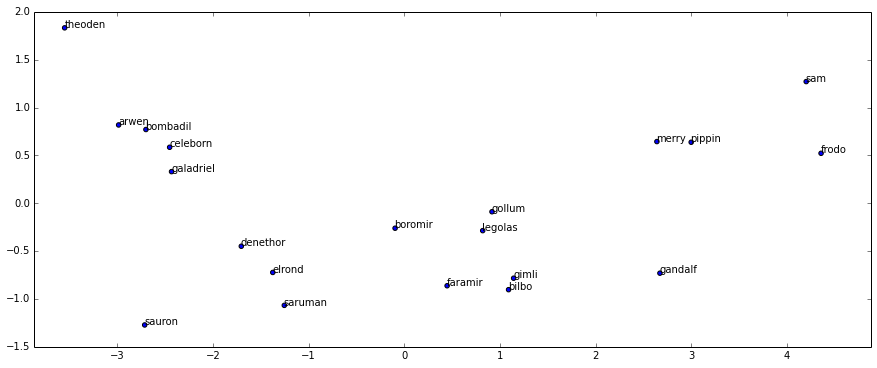

In [0]:
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

words = ['frodo', 'sam', 'pippin', 'merry', 'gandalf', 'gollum',
         'legolas', 'gimli', 'boromir', 'sauron', 'faramir', 'galadriel',
         'elrond', 'denethor', 'celeborn', 'arwen',
         'bilbo', 'theoden', 'saruman', 'bombadil']
X = model[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.figure(figsize=(15, 6))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.axis('equal') # чтобы рисунок был не растянут

Нужно помнить, что текст Властелина Колец - не такой уж и большой, для обучения нейронных сетей нужно гораздо больше текста. Например, 'bombadil' встречается в тексте всего 40 раз:

In [0]:
print(model.wv.vocab['frodo'].count, model.wv.vocab['bombadil'].count)

2042 40


Давайте найдем самые популярные слова и визуализиурем их, там качество должно быть неплохим.

In [0]:
most_popular_words = []
for word in model.wv.vocab:
    most_popular_words.append((model.wv.vocab[word].count, word))
most_popular_words.sort(reverse=True)

In [0]:
most_popular_words[:5]

[(34166, 'the'), (22246, 'and'), (16003, 'of'), (11169, 'to'), (9992, 'a')]

(-20.0, 15.0, -20.0, 20.0)

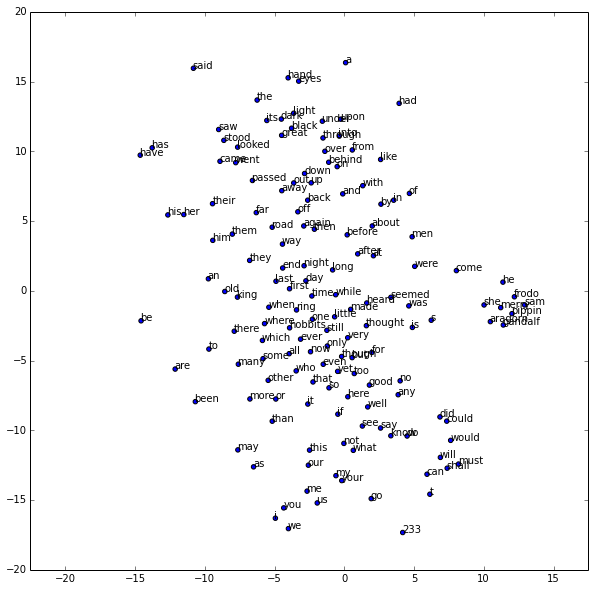

In [0]:
from sklearn.manifold import TSNE
words = [t[1] for t in most_popular_words[:150]]
X = model[words]
tsne = TSNE(n_components=2, n_iter=350)
result = tsne.fit_transform(X)
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.axis('equal') # чтобы рисунок был не растянут

### Большие серьезные векторы

<a href='https://nlp.stanford.edu/projects/glove/'>Здесь</a> можно скачать хорошие уже посчитанные векторы на большом-большом тексте, самый маленький файл весит 822 МБ.

ОСТОРОЖНО, сохранитесь, слабый компьютер может взорваться.

In [0]:
with open('glove.6B/glove.6B.200d.txtve=[]', 'r') as f:
    s = f.read()

with open('glove.6B/glove.6B.200d.txt', 'w') as f:
    f.write('400000 200\n') # сюда нужно написать размер словаря и размерность векторов
    f.write(s)

In [0]:
from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('glove.6B/glove.6B.200d.txt', binary=False)

Эти векторы очень качественные, с их помощью можно искать синонимы и часто используемые вместе слова:

In [0]:
model.wv.most_similar('good', topn=5)

[('better', 0.8141133785247803),
 ('really', 0.8016482591629028),
 ('always', 0.7913188338279724),
 ('sure', 0.7792829275131226),
 ('you', 0.7747212052345276)]

In [0]:
model.wv.most_similar('scary', topn=5)

[('frightening', 0.7768495678901672),
 ('weird', 0.6725902557373047),
 ('creepy', 0.6642469167709351),
 ('funny', 0.6637696027755737),
 ('terrifying', 0.6349161267280579)]

Заметьте, что эти слова не часто используются вместе. Они скорее играют одну РОЛЬ в предложении - встречаются с одними и те же словами. Это гораздо более крутой эффект, близко оказываются слова, которые представляют похожие сущности.

In [0]:
model.wv.most_similar('light', topn=5)

[('bright', 0.6242774724960327),
 ('dark', 0.6141002178192139),
 ('lights', 0.6013952493667603),
 ('lighter', 0.5581753253936768),
 ('heavy', 0.5408364534378052)]

In [0]:
model.wv.most_similar('russia', topn=5)

[('russian', 0.8110357522964478),
 ('ukraine', 0.7881113886833191),
 ('moscow', 0.763627290725708),
 ('belarus', 0.7365272045135498),
 ('putin', 0.6745897531509399)]

И самый бомба-эффект: можно проводить аналогии.

Как вы думаете, какой вектор получится, если посчитать $\text{king} - \text{man} + \text{woman}$?

Оказывается, если его посчитать, и найти самый близкий к нему, получится $\text{queen}$!

In [0]:
model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.6978678703308105)]

Так можно проводить и другие интересные аналогии:

In [0]:
model.wv.most_similar(positive=['plane', 'water'], negative=['air'], topn=1)

[('boat', 0.48164889216423035)]

In [0]:
model.wv.most_similar(positive=['small', 'strong'], negative=['weak'], topn=1)

[('large', 0.7153974771499634)]

In [0]:
model.wv.most_similar(positive=['italian', 'france'], negative=['italy'], topn=1)

[('french', 0.9404832124710083)]

In [0]:
model.wv.most_similar(positive=['moscow', 'japanese'], negative=['russian'], topn=1)

[('tokyo', 0.8163692951202393)]

In [0]:
model.wv.most_similar(positive=['russia', 'minsk'], negative=['moscow'], topn=1)

[('belarus', 0.8191080093383789)]

Векторы можно использовать не только для этого. Можно, например найти средний вектор предложения, и найти в нем самые **непохожие** на средний вектор слова.

Это, наверное, будут самые важные, самые выделяющиеся слова в предложении.

In [0]:
from copy import copy

def cosine_similarity(x, y):
    return np.dot(x, y) / (np.dot(x, x) * np.dot(y, y)) ** 0.5

def anchor_words(sentence, model):
    vector = None
    for word in sentence:
        if vector is None:
            vector = copy(model.wv[word])
        else:
            vector += model.wv[word]
    result = []
    for word in sentence:
        result.append((cosine_similarity(vector, model.wv[word]), word))
    result.sort()
    return result

In [0]:
anchor_words('frodo was waiting on the step smiling but looking rather tired and worried'.split(), model)

[(0.03679443221246287, 'frodo'),
 (0.48660987969903474, 'smiling'),
 (0.6227634581401656, 'tired'),
 (0.6644541739992597, 'step'),
 (0.6667104422680984, 'worried'),
 (0.7049139092208913, 'was'),
 (0.7109753032970967, 'waiting'),
 (0.7317963715787769, 'on'),
 (0.7398315186077599, 'and'),
 (0.7641320417645542, 'the'),
 (0.7831903742757153, 'rather'),
 (0.8357737716458266, 'looking'),
 (0.8576828802085694, 'but')]

In [0]:
anchor_words('albus dumbledore didnt seem to realize that he had just arrived in a street where everything from his name to his boots was unwelcome'.split(), model)

[(-0.024904113447186058, 'albus'),
 (0.03814113256384675, 'dumbledore'),
 (0.06935445328443235, 'didnt'),
 (0.19765637382125223, 'unwelcome'),
 (0.2794731103280894, 'boots'),
 (0.5120783233795322, 'street'),
 (0.5394053412510469, 'arrived'),
 (0.5510414887193306, 'realize'),
 (0.5899318872713595, 'seem'),
 (0.612957459570759, 'name'),
 (0.6971003662961485, 'everything'),
 (0.7078717432724547, 'a'),
 (0.726915906453164, 'from'),
 (0.7514079431531737, 'was'),
 (0.7643853533871631, 'in'),
 (0.7759421594463795, 'his'),
 (0.7759421594463795, 'his'),
 (0.7900245921481103, 'where'),
 (0.7910041141077997, 'had'),
 (0.7954600085124831, 'to'),
 (0.7954600085124831, 'to'),
 (0.842196372735454, 'just'),
 (0.8511542911375443, 'that'),
 (0.8639048493523835, 'he')]

Давайте посмотрим, что получится, если нарисовать самые популярные слова отсюда.

In [0]:
most_popular_words = []
for word in model.wv.vocab:
    most_popular_words.append((model.wv.vocab[word].count, word))
most_popular_words.sort(reverse=True)
most_popular_words[:5]

[(400000, 'the'), (399999, ','), (399998, '.'), (399997, 'of'), (399996, 'to')]

(-40.0, 40.0, -40.0, 40.0)

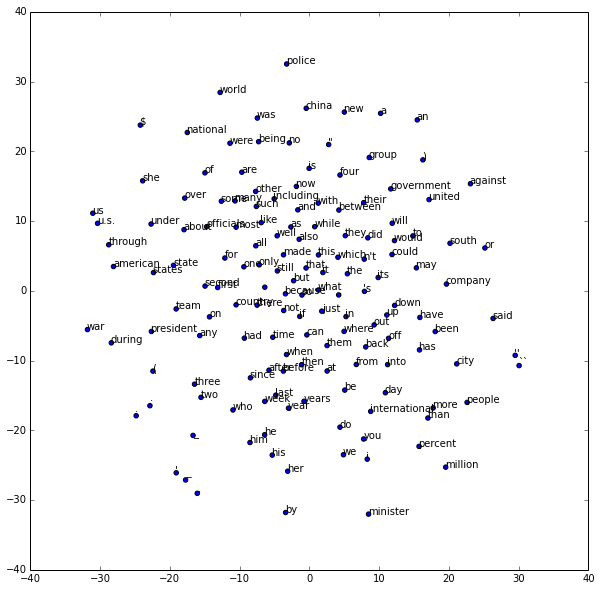

In [0]:
from sklearn.manifold import TSNE
words = [t[1] for t in most_popular_words[:150]]
X = model[words]
tsne = TSNE(n_components=2, n_iter=350)
result = tsne.fit_transform(X)
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.axis('equal') # чтобы рисунок был не растянут

### Word2Vec не только для слов
Не только слова можно вкладывать в пространство. Можно вкладывать все, что угодно, у чего существуют "предложения". 

Например, **товары** в интернет-магазине. Если посмотреть на все **сессии** пользователей - то есть последовательности посмотренных ими товаров, то они как раз представляют из себя разные "предложения" с товарами. Если запустить на них Word2Vec, то товары, которые часто пользователи смотрят вместе, как раз перейдут в близкие векторы.

Теперь мы можем посчитать вектор **пользователя** - это средний вектор товаров, которые он посмотрел.

Теперь, выбирая что порекомендовать пользователю, мы можем выбрать самые близкий по cosine_similarity к нему товар.

Можно использовать векторы для чего угодно:
* по сессиям пользователей построить векторы сайтов в интернете
* вектор пользователя = средний вектор посещенных сайтов - мы внезапно получили какие-то признаки для пользователей
* чтобы предсказать пол пользователя, построим средний вектор мужчин и средний вектор женщин, посмотрим на какой вектор нового пользователя больше похож

### Домашнее задание №3: Word2Vec

Выберите и сделайте какой-нибудь исследовательский проект на выбор:

1) Исследуем книжку
* Выберите какую-нибудь большую-большую книжку, чем больше, тем лучше. Например, всю Игру Престолов или всего Гарри Поттера (они уже лежат обработанные в том же архиве). Властелин Колец выбирать нельзя.
* Обучите на книжке Word2Vec.
* Выпишите в массив 10-15 имен главных персонажей. Визуализируйте векторы этих слов с помощью PCA и с помощью TSNE, подберите в TSNE хорошее число итераций, чтобы выглядело прилично. Сравните два метода. Находит ли word2vec какие-нибудь интересные закономерности, правда ли близкие персонажи на картинке тоже расположены рядом?
* Найдите топ слов, которые похожи на средний вектор выписанных вами имён. Учитывая, что мы от вектора используем только угол, для нахождения среднего вектора достаточно их просто сложить. По идее на "среднее имя" должны быть больше всего похожи другие имена. Так ли это? Сколько еще персонажей вы можете найти таким способом? То есть какой максимальный можно взять топ N, чтобы хотя бы примерно 90% из этих слов были тоже именами или фамилиями персонажей?
* Проверьте то же самое не с персонажами, а с названиями мест.
* Проверьте, выполняются ли на таком word2vec аналогии типа king + woman - man = queen? Попытайтесь найти примеры, когда выполняется, и когда не выполняется. Объясните результаты.
* Поисследуйте сами что-нибудь, поищите интересные эффекты, можете попытаться сами придумать себе задачу. Сделать выборку персонажей, где фичи - это их векторы, научиться предсказывать, кто жив, кто мертв, посчитать качество на тестовой части. Или просто найти средний вектор тех, кто мертв, и отсортировать всех по расстоянию до него. Найти, кто же умрет в следующей части Игры Престолов... Вряд ли получится что-то, конечно, но весело же.

2) Исследуем векторы GloVe
* Скачайте большие, но хорошие векторы GloVe <a href='https://nlp.stanford.edu/projects/glove/'>здесь</a>, откройте их в ноутбуке, как в примере выше. Это может занять время.
* Найдите побольше интересных аналогий помимо king + woman - man = queen
* Выпишите в массив 30-50 стран. Визуализируйте векторы этих слов с помощью PCA и с помощью TSNE, подберите в TSNE хорошее число итераций, чтобы выглядело прилично. Сравните два метода. Находит ли word2vec какие-нибудь интересные закономерности, правда ли близкие страны на картинке расположены рядом?
* Найдите топ слов, которые похожи на средний вектор выписанных вами стран. Учитывая, что мы от вектора используем только угол, для нахождения среднего вектора достаточно их просто сложить. По идее на "среднюю страну" должны быть больше всего похожи другие страны. Так ли это? Сколько еще стран вы можете найти таким способом? То есть какой примерно максимальный можно взять топ N, чтобы хотя бы примерно 90% из этих слов были тоже названиями стран?
* Проверьте то же самое со столицами, с именами, с названиями футбольных команд, с чем-нибудь еще (придумайте сами, подключите воображение)
* Поисследуйте сами что-нибудь, поищите интересные эффекты, можете попытаться сами придумать себе задачу. Например, сделайте датасет со странами, где признаки - это векторы, разделите его на тренировочную и тестовую часть и попытайтесь предсказать, например, континент страны. Можно просто посчитать для каждого континента в тестовой части средний вектор и выбирать наиболее близкий вектор как ответ. Можно выбрать любую другую задачу, лишь бы она была интересной, не обязательно брать страны, можно предсказывать часть речи по слову, например, тоже звучит интересно.

3) Детектируем SMS-спам
* Скачайте большие, но хорошие векторы GloVe <a href='https://nlp.stanford.edu/projects/glove/'>здесь</a>, откройте их в ноутбуке, как в примере выше. Это может занять время.
* Откройте табличку spam.csv по примеру внизу. spam - это спам, ham - это обычное сообщение.
* Выкиньте все знаки пунктуации, приведите все слова к нижнему регистру
* Посчитайте для каждого слова в сообщении его вектор, сложите их, получите вектор сообщения. 
* Разделите spam.csv на тренировочную и тестовую часть.
* На тренировочной части посчитайте средний вектор спамного сообщения
* Отсортируйте все сообщения в тестовой части по расстоянию до этого среднего вектора. Подберите порог, по которому отрезать спам от неспама, оцените accuracy. Если вы знаете, что такое ROC-AUC, посчитайте его.
* Оцените, хороший ли у вас результат. Или так же плохо, как и рандом? Попытайтесь улучшить качество как можно больше.

In [0]:
# Если вы выбрали третье задание, то вот как считать данные
import pandas as pd
data = pd.read_csv('spam.csv')
data.head(10)

,type,spam
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
5,spam,freemsg hey there darling it s been 3 week s n...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...


## Важно
Из трёх больших домашних заданий нужно выбрать и решить **только два**! Но можно, конечно, и все три :)

Еще раз: нужно решить только два задания из этих трех:

1) Уменьшение палитры изображения (кластеризация, попугаи, k-Means, DBSCAN)

2) Уменьшение размерности помогает классифицировать лица (PCA, TSNE, Буш)

3) Word2Vec (векторы, сложно, Игра Престолов, спам)